In [1]:
using Interact, Plots, DifferentialEquations, LinearAlgebra, Polynomials, BifurcationKit, Setfield, ForwardDiff
import BifurcationKit as BK
using NonLinearDynamicsCourse

WebIO._IJuliaInit()

# Caos en el Duffing

volvemos al oscilador de Duffing forzado y buscamos una región en el espacio de parámetros donde tengamos comportamiento aperiódico:

In [2]:
function duffing_forced!(du,u,p,t)
    (μ,β,A,ω)=p
    du[1] = u[2]
    du[2] = -μ*u[2]+u[1]*(β-u[1]*u[1])+A*cos(u[3])
    du[3] = ω
    du
end    

duffing_forced! (generic function with 1 method)

In [3]:
@manipulate throttle=0.5 for μ=0.0:0.01:2.0, β=-2.0:0.01:2.0,A=0:0.01:1, ω=0:0.01:1, x0=-2.0:0.01:2.0,ncycles=4:200
    flux2d_forced(duffing_forced!,[x0,0.0,0.0],[μ,β,A,ω],2*pi/ω;tcycles=0,ncycles=ncycles,xlims=(-2,2),ylims=(-1.5,1.5))
end  

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["μ"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 201, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
101, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000087ea2e90, Task (runnable) @0x0000000087ea2e90), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.01\",\"0.02\",\"0.03\",\"0.04\",\"0.05\",\"0.06\",\"0.07\",\"0.08\",\"0.09\",\"0.1\",\"0.11\",\"0.12\",\"0.13\",\"0.14\",\"0.15\",\"0.16\",\"0.17\",\"0.18\",\"0.19\",\"0.2\",\"0.21\",\"0.22\",\"0.23

Para ciertos valores de parametros (probar por ejemplo μ = 0.05, β = 1.0, A = 0.44, ω = 0.21) el oscilador de Duffing forzado presenta orbitas aperiodicas, esto es que no se cierran nunca y van llenando el espacio de fases de forma densa en una region. Si además cortamos esa región con una sección de Poincaré y el resutado es una estructura filamentosa y no una curva es muy posible que estemos frente a un régimen caótico. 

Es ademas muy dificil (por no decir imposible en la practica) predecir la evolucion de la trayectoria y anticipar en cual de los lobulos (x positivo o x negativo) va a estar la trayectoria luego de un cierto tiempo. El sistema tiene una de las caracteristicas que define a los **sistemas caoticos**. Una perturbacion infinitesimal en las condiciones iniciales conduce a dos trayectorias que se apartan entre si exponencialmente, algo que se conocio durante el boom de la Teoria del Caos en los '80 como "efecto Mariposa"

Las caracteristicas que definen un sistema caotico de forma mas rigurosa son

- Mixing topologico: cualquier region del espacio de fases por pequeña que sea se va a superponer con la evolucion temporal de cualquier otra region si se espera el tiempo suficiente
- Sensibilidad a las condiciones iniciales (efecto Mariposa), dos condiciones inciales muy proximas se alejan entre si durante un tiempo con una tasa de crecimiento exponencial. 
- Otra caracteristica que hace mas rigurosa la definicion es la existencia de infinitas orbitas periodicas inestables.

Nos va a interesar caracterizar solo la ultima propiedad, usamos la funcion butterfly para pasar una condicion incial xini y una perturbacion eps de $10^{-12}$ y en el grafico de la derecha vemos como se alejan entre si en escala logaritmica. A la pendiente positiva se la conoce como **exponente de Lyapunov**. Se puede probar otro sistema que converja a un atractor y mostrar que se ve una pendiente negativa. Un exponente de Lyapunov positivo se considera indicio de Caos.

In [4]:
butterfly(duffing_forced!,[1.0;-0.7;0.0],[0.14,1.0,0.28,1.0],120.0;delta=1e-12,dim=2)

# Caos Bouncing Ball en un circulo

Este es uno de los sistemas fisicos mas simples que presenta caos sin un forzado periodico. Se trata de una bola con gravedad en una cavidad circular. A diferencia del bouncing ball original que ocurria en una dimension este sistema fisico es bidimensional, por lo tanto necesitamos cuatro variables para describirlo: la posicion $x$, $y$ y las componentes de la velocidad $v_x$, $v_y$. Las ecuaciones son las mismas del bouncing ball original en la coordenada $y$ y de hecho el sistema parece excesivamente simple:

$\dot{x} = v_x$ 

$\dot{y} = v_y$ 

$\dot{v_x} = 0$ 

$\dot{v_y} = -g$

donde como antes suponemos que la masa es $1$. Lo complejo aca son las condiciones de borde, vamos a considerar una colision "hard", que si suponemos el origen de coordenadas en el centro de la cavidad y el radio de la misma igual a $1$ va a ser cuando se cumpla la condicion:

$x^2+y^2=1$

En ese caso suponemos una colision perfectamente elastica primero y el efecto de la reflexion es invertir la componente normal de la velocidad y conservar la tangencial, es decir si descomponemos el vector velocidad en una componente normal $v_n$ y otra tangencial $v_t$ el vector velocidad reflejado $v_r$ va a ser simplemente

$\vec{v_r} = \vec{v_{t}} - \vec{v_{n}}$

Estas componentes se pueden obtener haciendo el producto escalar con el vector radio unidad al sitio de la colision $(x,y)$
y al vector unidad tangente estos vectores son (en el punto de la colision).

$\hat{n} = (x,y)$

$\hat{t} = (-y,x)$

Entonces el vector resultante escrito en notacion vectorial queda:

$\vec{v_r} = (\vec{v}.\hat{t})\hat{t}-(\vec{v}.\hat{n})\hat{n}$

Escrito en las componentes cartesianas es un poco mas extenso pero no dificil de computar

$v_x \rightarrow v_x(y^2-x^2)-2xyv_y$

$v_y \rightarrow v_y(x^2-y^2)-2xyv_x$

Escribimos las ecuaciones del sistema, la condicion para la colision y la funcion bounce! para cambiar de direccion la velocidad.

In [5]:
function ballcirclehard!(du,u,p,t)
  du[1] = u[3]
  du[2] = u[4]
  du[3] = 0  
  du[4] = -p[1]
  du  
end

ballcirclehard! (generic function with 1 method)

In [6]:
function collision(u,t,integrator)
  1.0-sqrt(u[1]*u[1]+u[2]*u[2])
end

function collision2(u,t,integrator)
  sqrt(u[1]*u[1]+u[2]*u[2])-1.0
end


function bounce!(integrator)
  (x,y,vx,vy) = integrator.u
  integrator.u[3] = vx*(y*y-x*x)-2*x*y*vy
  integrator.u[4] = vy*(x*x-y*y)-2*x*y*vx
end

bounce! (generic function with 1 method)

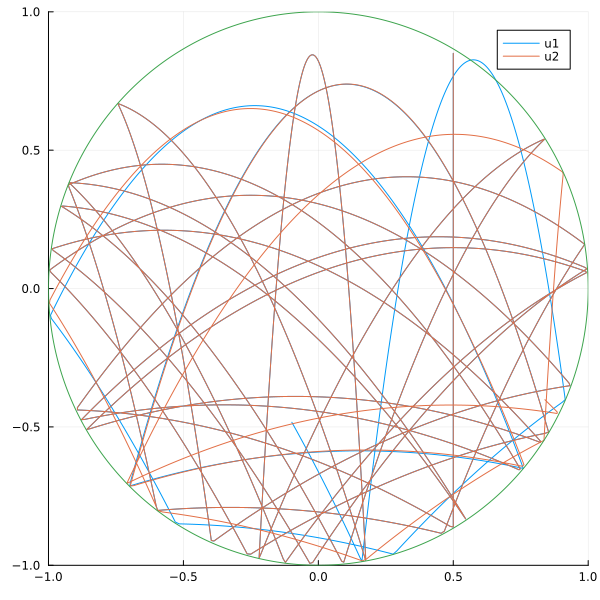

In [7]:
u1 = [0.5,0.85,0.0,0.0]
u2 = [0.5+1e-12,0.85,0.0,0.0]
tspan = (0.0,50.0)
g = 1.0
sol1 = solve(ODEProblem(ballcirclehard!,u1,tspan,[g]),callback=ContinuousCallback(collision,bounce!);)
sol2 = solve(ODEProblem(ballcirclehard!,u2,tspan,[g]),callback=ContinuousCallback(collision,bounce!);)
plot(sol1,idxs=(1,2),plotdensity=5000,xlims=(-1,1),ylims=(-1,1),label="u1")
plot!(sol2,idxs=(1,2),plotdensity=5000,xlims=(-1,1),ylims=(-1,1),label="u2")
plot!(cos.(2*pi*(0:0.001:1)),sin.(2*pi*(0:0.001:1)),label="",size=(600,600))

Notar que el sistema no tiene puntos fijos porque $\dot{v_y}$ es siempre negativa. El comportamiento errático y la sensibilidad a las condiciones iniciales está dado en este caso por las condiciones de contorno que hacen que la dirección de movimiento cambie amplificando las pequeñas diferencias en las trayectorias. Es decir que no lo podemos analizar con las herramientas que venimos aplicando hasta ahora. Se podría transformar la evolución continua del disco como un flujo 4D a un mapa 3D con el angulo, la velocidad normal y la tangencial como variables, pero es una tarea larga...


In [8]:
# ATENCION Esto es para hacer la animacion de la clase, puede demorar varios minutos! Se puede disminuir el N o aumentar el dt
N = 500; dt = 0.1
anim = @animate for n=1:N
    p1 = plot(cos.(2*pi*(0:0.001:1)),sin.(2*pi*(0:0.001:1)),color=:black,legend=false,size=(660,600))
    plot!(p1,sol1,idxs=(1,2),tspan=(0,n*dt),plotdensity=200*n,xlims=(-1,1),ylims=(-1,1),color=:red,alpha=0.2)
    plot!(p1,sol2,idxs=(1,2),tspan=(0,n*dt),plotdensity=200*n,xlims=(-1,1),ylims=(-1,1),color=:blue,alpha=0.2)
    scatter!(p1,sol1,idxs=(1,2),tspan=(n*dt,n*dt),color=:red,markersize=10,alpha=0.5)
    scatter!(p1,sol2,idxs=(1,2),tspan=(n*dt,n*dt),color=:blue,markersize=10,alpha=0.5)
end;

┌ Info: Saved animation to 
│   fn = C:\Users\Camilo\NonLinearDynamicsCourse\Lectures\files\bouncing_chaos_single.gif
└ @ Plots C:\Users\Camilo\.julia\packages\Plots\AAjgN\src\animation.jl:139


Plots.AnimatedGif("C:\\Users\\Camilo\\NonLinearDynamicsCourse\\Lectures\\files\\bouncing_chaos_single.gif")
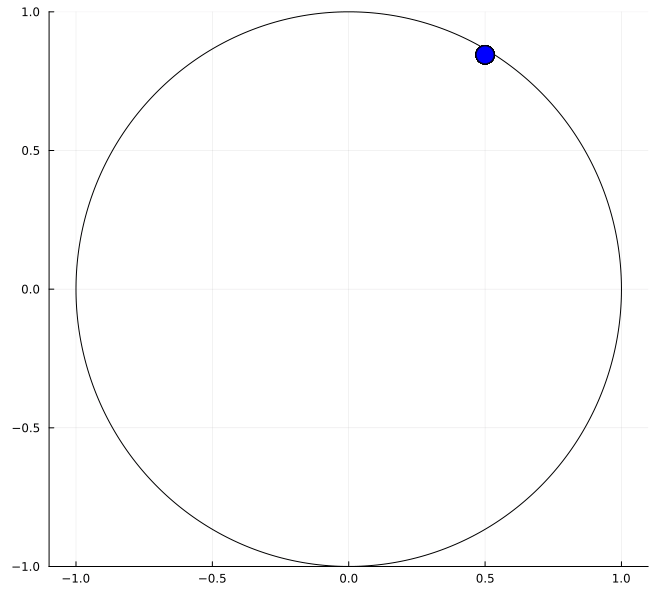

In [9]:
gif(anim, "../files/bouncing_chaos_single.gif", fps = 30)

In [10]:
ts = range(0, stop=50, length=50000)
dd = (sol1(ts,idxs=2)-sol2(ts,idxs=2)).^2+(sol1(ts,idxs=1)-sol2(ts,idxs=1)).^2
plot(ts,0.5*log10.(dd))

LoadError: MethodError: no method matching similar(::Float64, ::Type{Float64})
[0mClosest candidates are:
[0m  similar([91m::Union{Adjoint{T, var"#s885"}, Transpose{T, var"#s885"}} where {T, var"#s885"<:(AbstractVector)}[39m, ::Type{T}) where T at C:\Users\Camilo\AppData\Local\Programs\Julia-1.8.2\share\julia\stdlib\v1.8\LinearAlgebra\src\adjtrans.jl:207
[0m  similar([91m::Union{Adjoint{T, S}, Transpose{T, S}} where {T, S}[39m, ::Type{T}) where T at C:\Users\Camilo\AppData\Local\Programs\Julia-1.8.2\share\julia\stdlib\v1.8\LinearAlgebra\src\adjtrans.jl:211
[0m  similar([91m::Union{Adjoint{T, S}, Transpose{T, S}} where {T, S}[39m, ::Type{T}, [91m::Tuple{Vararg{Int64, N}}[39m) where {T, N} at C:\Users\Camilo\AppData\Local\Programs\Julia-1.8.2\share\julia\stdlib\v1.8\LinearAlgebra\src\adjtrans.jl:212
[0m  ...

Lo que si podemos evaluar es la separacion exponencial de las trayectorias que aca abarca 12 ordenes de magnitud.

# El Problema de los Tres Cuerpos (Restringido)

Falta la deducción de esta parte. 
Esta versión del problema de los tres cuerpos es restringida en el sentido siguiente:
- los tres cuerpos tienen trayectorias en el mismo plano
- la masa de uno de ellos es despreciable respecto de los otros dos. Solo se considera la atraccion gravitatoria mutua entre los dos primeros y la accion de los dos primeros cuerpos sobre el tercero pero no a la inversa.

Este problema sirve por ejemplo para estudiar la trayectoria de una nave espacial en el sistema tierra-luna. 
En particular Egorov en la URRSS y Arenstorf (matemático trabajando en la NASA en los '60) estudiaron trayectorias "resonantes" con formas de pétalo que forman islas de estabilidad en el espacio de parámetros. Un review un poco más reciente que tiene como coautor a Buzz Aldrin se puede ver acá:
https://ntrs.nasa.gov/api/citations/20150018049/downloads/20150018049.pdf

El sistema de ecuaciónes para el movimiento de la nave en el sistema de referencia solidario a la rotación de los dos primeros cuerpos es el siguiente:

$\dot{x} = v_x$

$\dot{y} = v_y$

$\dot{v_x} = x + 2 v_y - \mu'(x+\mu)/D_1 - \mu(x-\mu')/D_2 $

$\dot{v_y} = y + 2 v_x - \mu' y/D_1 - \mu y/D_2 $

$D1 = ((x+\mu)^2+y^2)^{3/2}$,       $D2 = ((x-\mu')^2+y^2)^{3/2}$

$\mu' = 1 - \mu $

y con los valores de parametros y condiciones iniciales

$\mu= 0.012277471$, que es el cociente de la masa de la luna con respecto a la tierra

$u_0 = (0.994,0,0,-2.002585106379)$ que corresponde posición y la velocidad inicial de la nave.

In [11]:
function threebody!(du,u,p,t)
    D1 = ((u[1]+p[1])*(u[1]+p[1])+u[2]*u[2])^(3/2)
    D2 = ((u[1]-p[2])*(u[1]-p[2])+u[2]*u[2])^(3/2)
    du[1]=u[3]
    du[2]=u[4]
    du[3]=u[1]+2.0*u[4]-p[2]*(u[1]+p[1])/D1-p[1]*(u[1]-p[2])/D2
    du[4]=u[2]-2.0*u[3]-p[2]*u[2]/D1-p[1]*u[2]/D2
    du
end    
    

threebody! (generic function with 1 method)

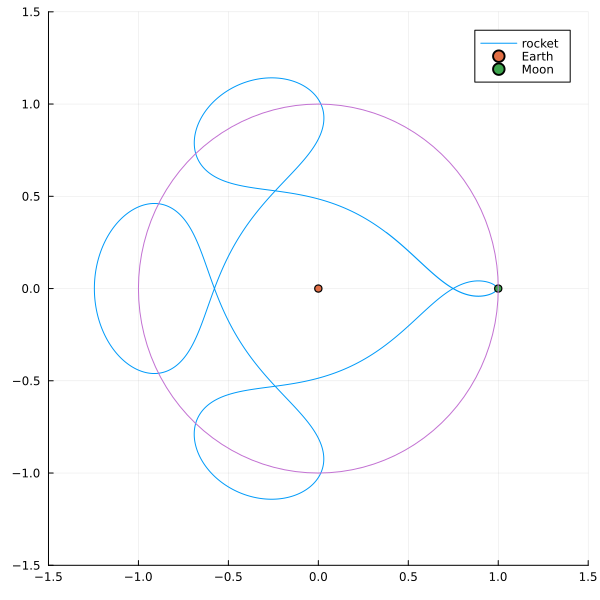

In [12]:
u0 = [0.994,0,0,-2.0015851]
μ = 0.012277471 # Moon
tspan = (0,18.0)
sol = solve(ODEProblem(threebody!,u0,tspan,[μ,1.0-μ]),Vern9());
plot(sol,idxs=(1,2),label="rocket")
scatter!([0],[0],label="Earth")
scatter!([1],[0],label="Moon")
plot!(cos.(2*pi*(0:0.01:1)),sin.(2*pi*(0:0.01:1)),label="",size=(600,600),xlim=(-1.5,1.5),ylim=(-1.5,1.5))

In [13]:
@manipulate throttle=.1 for x0=0.993:0.000005:0.996, vy0=-2.1:0.001:-2
    u0 = [x0,0,0,vy0]
    tspan = (0,20.0)
    sol = solve(ODEProblem(threebody!,u0,tspan,[μ,1.0-μ]),Vern9());
    plot(sol,idxs=(1,2))
    scatter!([0],[0])
    scatter!([1],[0])
    plot!(cos.(2*pi*(0:0.01:1)),sin.(2*pi*(0:0.01:1)),size=(600,600),xlim=(-1.5,1.5),ylim=(-1.5,1.5))
end    

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["x0"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 601, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
301, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000000901f7080, Task (runnable) @0x00000000901f7080), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.993\",\"0.993005\",\"0.99301\",\"0.993015\",\"0.99302\",\"0.993025\",\"0.99303\",\"0.993035\",\"0.99304\",\"0.993045\",\"0.99305\",\"0.993055\",\"0.99306\",\"0.993065\",\"0.99307\",\"0.993075\",\"0.99308\"

# Sistema de Lorenz

Este es sin duda el sistema dinámico más famoso que presenta caos. El origen se remonta a un trabajo original realizado por Edward Lorenz en 1963 planteando una reducción a tres ecuaciones diferenciales de un modelo simplificado de convección atmosférica (el modelo original tenía 12 ecuaciones). 

<div>
<img src="../files/convection.png" width="700px">
</div>

En el modelo la capa inferior de la atmósfera está a mayor temperatura que la superior. Si esa diferencia de temperatura es pequeña hay un gradiente de temperatura (una variación lineal de la temperatura con la altura) pero por encima de cierto valor crítico el aire caliente sube y el frio baja formando rollos de convección como se ve en la figura. 

Para una historia de cómo Lorenz descubrió la sensibilidad a las condiciones iniciales de este sistema a partir de un truncamiento de la simulación numérica impresa en papel y el verdadero origen del término "butterfly effect" puede verse https://www.youtube.com/watch?v=bZ6yxt_o_CQ

$\dot{x} = \sigma(y-x)\\
\dot{y} = \rho x - y - xz\\
\dot{z} = xy - \beta z$

En este sistema la variable $x$ corresponde a la intensidad de la convección (cuan rápido giran los rollos), la variable $y$ a la diferencia de temperatura entre la corriente de aire caliente que sube y la fría que baja y $z$ a la desviación de la variación lineal de temperatura con la altura. Los parámetros también tienen significado físico, si bien poco conocidos fuera del dominio de la dinámica de fluidos: $\sigma$ es el número de Prandtl, $\rho$ el número de Rayleigh y $\beta$ un factor geométrico.

Para observar caos se usan tradicionalmente los valores $\sigma=10$, $\rho=28$ y $\beta=8/3$, si bien estos valores no corresponden a ningún sistema físico en particular. Para valores del numero de Rayleigh elevados $\rho>1$ el truncamiento hecho por Lorenz a sólo tres modos deja de ser válido, por lo tanto si bien el modelo puede explicar el origen de los rollos de convección (para $\rho=1$) el régimen caótico no se corresponde con el modelo físico. Sin embargo al ser un sistema relativamente simple de analizar y sobre todo por motivos históricos el modelo de Lorenz se transformó en el "modelo de modelos" que presentan caos.

In [14]:
function lorenz!(du,u,p,t)
    (σ,ρ,β)=p
    du[1]=σ*(u[2]-u[1])
    du[2]=ρ*u[1]-u[2]-u[1]*u[3]
    du[3]=u[1]*u[2]-β*u[3]
    du
end    

lorenz! (generic function with 1 method)

In [15]:
σ=10.0; β=8.0/3.0
@manipulate throttle=0.5 for x0=-1.0:0.1:1.0,ρ=0.5:0.1:25.0, tmax=1:1:100
    sol = solve(ODEProblem(lorenz!,[x0,0.1,5.0],(0.0,tmax),[σ,ρ,β]));
    plot(sol,idxs=(1,2,3),label="lorenz")
end    

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["x0"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 21, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
11, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000087e8e100, Task (runnable) @0x0000000087e8e100), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-1.0\",\"-0.9\",\"-0.8\",\"-0.7\",\"-0.6\",\"-0.5\",\"-0.4\",\"-0.3\",\"-0.2\",\"-0.1\",\"0.0\",\"0.1\",\"0.2\",\"0.3\",\"0.4\",\"0.5\",\"0.6\",\"0.7\",\"0.8\",\"0.9\",\"1.0\"],\"changes\":WebIO.getval({\"name

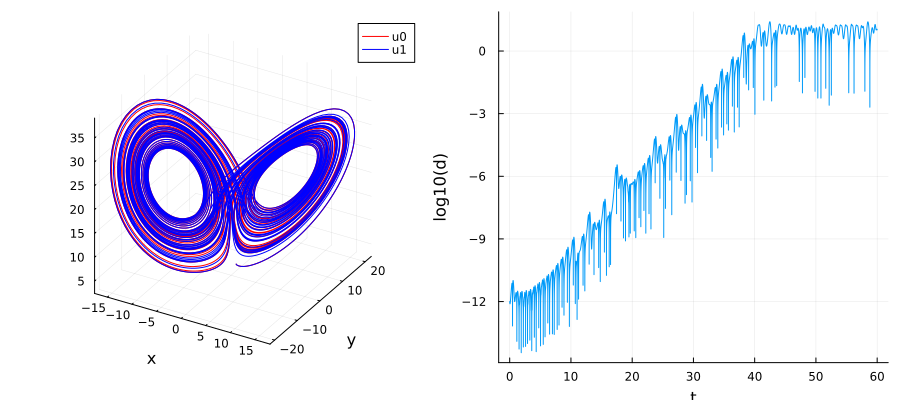

In [16]:
σ=10.0; β=8.0/3.0
butterfly(lorenz!,[1.0;0.1;5.0],[σ,23.7,β],60.0; dim=3)

## Analisis de Bifurcaciones

Evaluamos primero los posibles puntos fijos del sistema. De la primera nulclina tenemos $y_*=x_*$, aplicandola en la tercera tenemos $z_*=x_*^2/\beta$, y finalmente de la condición dada por la segunda ecuación tenemos lo siguiente:

$\beta(\rho-1)x_*-x_*^3=0$

que es la forma normal de la pitchfork que se produce para $\rho=1$. Con un poco de esfuerzo o mediante simulaciones se puede ver que esa pitchfork es supercrítica.  Esta es la bifurcación que da origen a los rollos de convección porque el sistema pasa del reposo a una solución con una velocidad creciente de convección. En el sistema de Lorenz esto corresponde par de puntos fijos con coordenadas $x$ mayor o menor que cero, que se corresponden en el fluido con rollos de convección rotando hacia uno u otro lado (una sola de las soluciones es posible). El origen se transforma en un punto silla.

Estos puntos fijos pierden estabilidad para un valor de $\rho_c$ mas elevado mediante una bifurcación de Hopf subcrítica que emite ciclos límites inestable que existen para valores del parámetro menores que $\rho_c$. Estos ciclos experimentan una serie de bifurcaciones y finalmente colisionan con el saddle en una bifurcación homoclínica, pero el análisis es muy enrevesado por lo que vamos a explorarlo numéricamente con BifurcationKit

In [17]:
function lorenz_jac(u,p)
    (σ,ρ,β)=p  
    J = Array{Float64, 2}(undef, 3, 3)
    J[1,1] = -σ
    J[1,2] = σ
    J[1,3] = 0
    J[2,1] = ρ-u[3]
    J[2,2] = -1
    J[2,3] = -u[1]
    J[3,1] = u[2]
    J[3,2] = u[1]
    J[3,3] = -β
    return J
end

lorenz_jac (generic function with 1 method)

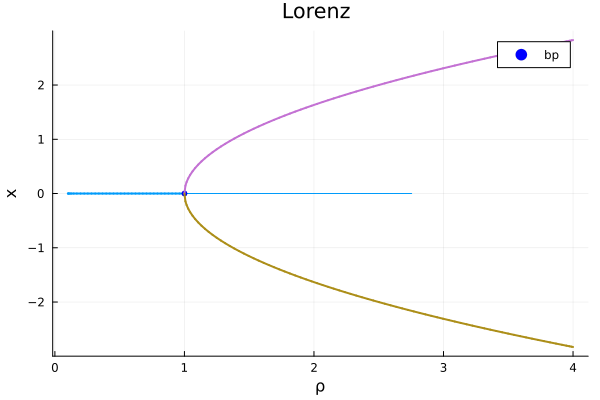

In [18]:
lorenz(u,p) = lorenz!(similar(u),u,p,0)
jet  = BifurcationKit.getJet(lorenz,lorenz_jac)
opts = ContinuationPar(pMin=0.1, pMax=4.0, ds = 0.001, dsmax = 0.02,detectBifurcation = 3)
FJ = BifurcationKit.getJet(lorenz,(z,p) -> ForwardDiff.jacobian(x -> lorenz(x,p), z))
br1, = continuation(lorenz,lorenz_jac,[0.1;0.1;1.0],[10.0,0.1,8/3.0],(@lens _[2]),opts,recordFromSolution = (x, p) -> x[1])
opts = ContinuationPar(pMin=1.0, pMax=4.0, ds = -0.01, dsmax = 0.04,detectBifurcation = 3)
br2, = continuation(lorenz,lorenz_jac,[3.0;3.0;1.0],[10.0,4.0,8/3.0],(@lens _[2]),opts,recordFromSolution = (x, p) -> x[1])
br3, = continuation(lorenz,lorenz_jac,[-3.0;-3.0;1.0],[10.0,4.0,8/3.0],(@lens _[2]),opts,recordFromSolution = (x, p) -> x[1])
plot(br1)
plot!(br2)
plot!(br3,xlabel="\\rho",title="Lorenz ",fmt=:png)

In [19]:
pitchfork = computeNormalForm(jet..., br1, 1)

SuperCritical - Pitchfork bifurcation point at p ≈ 1.0005115343845243
Normal form x⋅(b1⋅δp + b3⋅x²/6): 
(a = 2.3106571957041555e-16, b1 = 0.9090140484435941, b2 = -2.3094758436219573e-16, b3 = -1.0226408098324664)


Tal como habíamos anticipado, tenemos un punto fijo atractor en el origen que pierde estabilidad con un pitchfork para $\rho=1$. Veamos ahora como cada una de las ramas para $\rho\approx24.7$ pierde estabilidad mediante una Hopf.

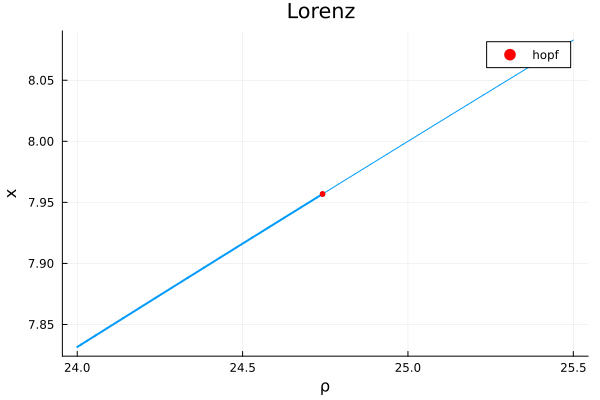

In [20]:
opts = ContinuationPar(pMin=24.0, pMax=25.5, ds = 0.01, dsmax = 0.04,detectBifurcation = 3)
br4, = continuation(lorenz,lorenz_jac,[8.0;8.0;20.0],[10.0,24.0,8/3.0],(@lens _[2]),opts,recordFromSolution = (x, p) -> x[1])
plot(br4,xlabel="\\rho",title="Lorenz ",fmt=:png)

In [21]:
hopf = computeNormalForm(jet..., br4, 1)

SubCritical - Hopf bifurcation point at p ≈ 24.741806138324367.
Frequency ω ≈ 9.625430734056621
Period of the periodic orbit ≈ 0.6527692610106757
Normal form z⋅(iω + a⋅δp + b⋅|z|²): 
(a = 0.03021784293296937 - 0.18142818651449372im, b = 0.0025554180283046753 + 0.02765257083818891im)


La Hopf es subcrítica por lo tanto no hay atractores para $\rho_c>24.7418$, ni puntos fijos ni ciclos límites. Pero el flujo no diverge y se mantiene acotado, entonces donde va a parar? 

Como puede verse en la simulación se mantiene circulando de forma aperiódica arbitrariamente cerca de una estructura aproximadamente bidimensional (curiosamente con forma de "mariposa") que al igual que en el Duffing forzado es fractal. 

Este atractor extraño no es creado por la Hopf, de hecho existe para valores de $\rho$ menores ya que las orbitas periódicas inestables coexisten con los puntos fijos creados en la pitchfork y atraviesan una serie de bifurcaciones (b\'asicamente duplicaciones de período) que crean una estructura de infinitas órbitas periódicas inestables. Esta estructura no es detectable antes de la Hopf porque todas las condiciones va a parar a los puntos fijos (si bien pueden tener transitorios arbitrariamente largos). Lo que marca la Hopf es el fin de la coexistencia de los atractores con la estructura fractal creada por las órbitas periódicas inestables.

Por lo tanto para $\rho>24.7418$ todas las condiciones iniciales van a ser atraídas a un entorno de esa estructura y van a circular por los dos loops del atractor extraño pero sin cruzarse nunca, enhebrando su trayectoria de una forma única en medio de la maraña de órbitas periódicas inestables. 

Para ver de forma un poco más cuantitativa por qué existen infinitas órbitas periódicas inestables y cómo se vincula eso con la sensibilidad a las condiciones iniciales vamos a ver una versión geométrica simplicada del atractor extraño del sistema de Lorenz propuesta por Guckenheimer en los '70 y que posteriormente se probó que es topológicamente equivalente al atractor original.

## Lorenz Geometrico y orbitas periódicas inestables

Podemos entender la sensibilidad a las condiciones iniciales y la aparición de infinitas órbitas periódicas estudiando el siguiente templado que es topológicamente equivalente al atractor extraño de Lorenz:

<div>
<img src="../files/lorenz1.jpg" width="500px">
</div>

Como puede verse, con cada vuelta ya sea por el loop de la derecha o el de la izquierda las trayectorias se separan entre sí en la dirección transversal su evolución temporal (expansión) y cuando llegan al pliegue central se dividen al medio (plegado). Este proceso de expansión, que puede verse como multipicar por dos en cada ciclo a la separación entre trayectorias, con un plegado, que puede verse como aplicar la operación módulo, es el responsable de generar la estructura topológica del atractor.

Si hacemos un seccion de Poincare en la linea central y la hacemos corresponder al intervalo $[0,1]$, esto equivale al mapa:

$x \rightarrow 2x \mod 1$

En este mapa todos los numeros racionales corresponden a orbitas periodicas inestables. Por ejemplo:

$1/3 \rightarrow 2/3 \rightarrow 1/3 \quad$ período 2

$1/5 \rightarrow 2/5 \rightarrow 4/5 \rightarrow 3/5 \rightarrow 1/5\quad$ período 4

$1/7 \rightarrow 2/7 \rightarrow 4/7 \rightarrow 1/7\quad$ período 3

$1/15 \rightarrow 2/15 \rightarrow 4/15 \rightarrow 8/15 \rightarrow 1/15$ período 4

Dos condiciones iniciales cualesquiera:$x0$ y  $x0+\delta$ con $\delta$ arbitrariamente pequeño se separan exponencialmente ya que su diferencia se duplica con cada ciclo.

Es decir que **tenemos infinitas órbitas periódicas porque hay infinitos racionales y todas esas órbitas periódicas son inestables**, lo cual es otro requisito para el caos. 

Por otra parte la sensibilidad a las condiciones iniciales se puede ver de forma directa, si representamos $x0$ en notacion binaria:

In [22]:
x0 = parse(Int64, bitstring(1/7), base=2)
for n = 1:20
    bs=bitstring(x0)
    println(bs[13:48])
    x0 *= 2
end    

001001001001001001001001001001001001
010010010010010010010010010010010010
100100100100100100100100100100100100
001001001001001001001001001001001001
010010010010010010010010010010010010
100100100100100100100100100100100100
001001001001001001001001001001001001
010010010010010010010010010010010010
100100100100100100100100100100100100
001001001001001001001001001001001001
010010010010010010010010010010010010
100100100100100100100100100100100100
001001001001001001001001001001001001
010010010010010010010010010010010010
100100100100100100100100100100100100
001001001001001001001001001001001001
010010010010010010010010010010010010
100100100100100100100100100100100100
001001001001001001001001001001001000
010010010010010010010010010010010000


Como puede verse cada iteración del mapa consiste simplemente en correr los digitos un lugar hacia la izquierda (multiplcar por dos o lo que en programación de bajo nivel se conoce como un bit-shift) y quitar el primer digito de la parte entera.
En la notacion binaria, al igual que en los números decimales, todos los números racionales corresponden con una serie de dígitos que se termina o que se repite con un patrón periódico. Por lo tanto todos los racionales van a repetir el patron cada cierta cantidad de ciclos. En el caso anterior la fracción 1/5 corresponde a un período 4.

Vamos a ver el mapa equivalente en el sistema decimal con el cual estamos más familiarizados.
Mapa decimal 

$x \rightarrow 10x \mod 1$

In [25]:
using Quadmath, Printf

x0 = Float128(1.0)/Float128(7.0)
for n=1:12
    @printf "%.30g\n" x0-floor(x0)
    x0 *= 10
end    

0.142857142857142857142857142857
0.428571428571428571428571428571
0.285714285714285714285714285714
0.857142857142857142857142857143
0.571428571428571428571428571428
0.714285714285714285714285714285
0.142857142857142857142857142843
0.428571428571428571428571428427
0.285714285714285714285714283868
0.857142857142857142857142838679
0.571428571428571428571428335091
0.714285714285714285714283350913


En este caso la fracción 1/7 en decimales tiene período 6 porque se repite siempre el patrón 142857. Al igual que en el caso anterior cada iteración del mapa (multiplicar por 10) corresponde a correr un lugar hacia la izquierda a todos los dígitos y quitar la parte entera (módulo 1).

Sin embargo como puede verse a diferencia del caso anterior, luego de 12 ciclos empiezan a aparecer digitos extraños por la derecha debido a que la representación interna del número como float (aun utilizando 128 bits!) es finita y a partir del dígito 35 aproximadamente deja de repetir la secuencia, porque ya deja de tener sentido la representación decimal con esa precisión. Podemos ver esto como una "perturbación" del racional preciso en una cantidad infima pero que tarde a o temprano sale a la luz por el mecanismo de ir corriendo los dígitos a la izquierda. Notar que lo que sucede en binario es que cuando llegamos al límite de precisión aparecen ceros por la derecha  dado que usamos una representacion como entero para mayor claridad. 

Si tomamos una condición inicial arbitraria esto va a corresponder de forma genérica a un número irracional con infinitos decimales aperiódicos. En la representación del mapa decimal la propia secuencia de digitos de la condición inicial contiene toda su historia futura ya que me va a decir por que décimo de la sección va a pasar en cada iteración del mapa

In [26]:
x0 = Float128(pi)
for n=1:12
    @printf "%.30g\n" x0-floor(x0)
    x0 *= 10
end   

0.14159265358979323846264338328
0.415926535897932384626433832795
0.15926535897932384626433832795
0.592653589793238462643383279503
0.926535897932384626433832795031
0.265358979323846264338327950295
0.653589793238462643383279502952
0.535897932384626433832795029523
0.358979323846264338327950295229
0.589793238462643383279503055691
0.897932384626433832795031384087
0.979323846264338327950287371086


Por otra parte un intervalo o entorno aunque sea arbitrariamente pequeño va a estar representado por una secuencia finita de digitos decimales. 

Si queremos saber por ejemplo si esa trayectoria generica que empezó en un irracional ($\pi$) va a pasar cerca de dicho entorno no es necesario que la evolucionemos. Solo tenemos que evaluar si esa secuencia finita de digitos aparece en alguna parte en la representacion decimal de la condición inicial $\pi$ y la respuesta es que es altamente probable aunque no este probado. Por lo tanto tenemos la última de las condiciones necesarias para el caos.

Por lo tanto:

El mapa unidimensional de la sección del atractor geométrico de Lorenz (así como su versión decimal más gráfica) contienen la esencia del caos ya que 
- (1) una condición inicial genérica corresponde a un número irracional y la trayectoria que se inicia en este punto pasa arbitrariamente cerca de cualquier entorno en el intervalo $[0,1]$.
- (2) cualquier perturbación arbitrariamente pequeña en la condición inicial, por ejemplo una diferencia en un digito que esta arbitrariamente lejos a la derecha en su representación binaria o decimal se va a amplifica hasta el tamaño del intervalo $[0,1]$ porque la evolución temporal corresponde a ir corriendo los digitos hacia la izquierda y esa diferencia va a llegar tarde o temprano al primer dígito
- (3) existen infinitas órbitas periódicas inestables que corresponden a los números racionales sobre el intervalo.